In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 
def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95]):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])

    ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.legend(prop={'size': 20},loc='best')#,shadow=True)

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        
    plt.savefig(pltname, bbox_inches = "tight")

In [2]:
# num_CNT_Files=1
# num_layers=280
# num_layers_contacts=28
# num_layers_ch =num_layers-2*num_layers_contacts #ch for channel

# acc = 0.142e-9 #nm
# nring_per_unitcell = 4 #for a zigzag nanotube
# Y_offset = -15.0165e-9 #nm
# nano=1e-9

# layer = np.empty((num_CNT_Files,num_layers),dtype=int)
# avg_field = np.empty((num_CNT_Files,num_layers),dtype=float)

# file_name = np.empty(num_CNT_Files,dtype=object)

# #path = '../ImpRuns/GVdot5V_NoChargeDensity/'
# #path = '../ImpRuns/GVdot5V_someChargeDensity/'
# #path = '../ImpRuns/Verification_XdZdot5V_NoChargeDensity/'
# path = ''

In [3]:
# for c in range(0, num_CNT_Files):
#     file_name[c] = path + 'avg_gatherField_%d.dat'%(c)

# for f in range(0,num_CNT_Files):
#     file = open(file_name[f])
#     lst = []
#     counter=0
#     for line in file:     
#         if (counter >= 0):
#             lst += [line.split()]
#         else:
#             print(line)
#         counter = counter + 1 
#     layer[f]      = [x[0] for x in lst]
#     avg_field[f]  = [x[1] for x in lst]
        

In [4]:
# print(file_name[0])

In [5]:
# axial_loc = np.empty(num_layers,dtype=float)

# def get_axial_loc(r,ACC):
#     y=0.
#     if(r % 2 == 0):
#         y = ACC
#     elif (r%2 == 1):
#         y = ACC/2
#     return y
 
# axial_loc[0]=acc

# for l in range(1,num_layers):
#     rID_in_unitcell = l%nring_per_unitcell   
# #    print(rID_in_unitcell)
#     axial_loc[l] = axial_loc[l-1] + get_axial_loc(rID_in_unitcell,acc)
    
# for l in range(0,num_layers):
#     axial_loc[l] += Y_offset                  
    

In [6]:
# layer_ch = np.empty((num_CNT_Files,num_layers_ch),dtype=int)

# axial_loc_ch = np.empty(num_layers_ch,dtype=float)
# avg_field_ch = np.empty((num_CNT_Files,num_layers_ch),dtype=float)

# for f in range(0,num_CNT_Files):
#     axial_loc_ch = axial_loc[num_layers_contacts:num_layers-num_layers_contacts]
#     avg_field_ch[f] = avg_field[f][num_layers_contacts:num_layers-num_layers_contacts]
    
# # custom_plot_single([axial_loc/nano,axial_loc_ch/nano], 
# #                    [avg_field[0],avg_field_ch[0]],
# #                    [r'avg field',r'avg field (in channel)'],
# #                    [-16,16],[-0.01,0.5],[r'Layer / (nm)',r'Potential / (V)'],'Layer_vs_Potential.png')

# custom_plot_single([axial_loc/nano], 
#                    [avg_field[0]],
#                    [r'avg field',r'avg field (in channel)'],
#                    [-16,16],[-0.01,0.5],[r'y / (nm)',r'Avg. potential on CNT surface / (V)'],'Layer_vs_Potential.png')



# NEGF

### parameter definition

In [7]:
hbar=1.06e-34
q=1.602e-19
gamma=2.5 #eV
acc=0.142e-9
m=16 
n=0
nano=1e-9

#N=num_layers_ch
#U=avg_field_ch

def get_radius(acc,m,n):
    return acc*(np.sqrt(3.)/(2*np.pi))*np.sqrt(m**2 + m*n + n**2)


R = get_radius(acc,m,n)
print('Radius of CNT (nm):', R/nano)

Eg_min = acc*gamma/R
print('bandgap, H/(eV):', Eg_min)

Us=0.0 #V, Source potential
Ud=0.0 #V, Drain potential

N=4
U=np.zeros(N)
print(U)
print('number of layers in the channel: ', N)

q = math.gcd(m, n)
Int=(m-n)/(3*q)
print('q',q)
print('Int',Int)
if(Int.is_integer()):
    d_R = 3*q
else:
    d_R = q
print('d_R',d_R)
Natoms_per_UC=int(4*(m**2+m*n+n**2)/d_R)
print('number of atoms per unit cell',Natoms_per_UC)

if(n==0): #zigzag
    M =  int(Natoms_per_UC/4)
elif(m==n): #armchair
    M = int(Natoms_per_UC/2)
else:
    M = np.abs(m-n)
print('number of total modes or atoms along the ring', M)
M_red = M
print('number of modes used to construct hamiltonian', M_red)


Radius of CNT (nm): 0.6263096251991558
bandgap, H/(eV): 0.566812301323193
[0. 0. 0. 0.]
number of layers in the channel:  4
q 16
Int 0.3333333333333333
d_R 16
number of atoms per unit cell 64
number of total modes or atoms along the ring 16
number of modes used to construct hamiltonian 16


### Bandgap (From Theory)

In [8]:

def get_bandgap_for_mode(p,acc,gamma,m,n):
    R=get_radius(acc,m,n)
    Eg_case=np.zeros(6,dtype=float)
    if(p>0):
        Eg_case[0] = (acc*gamma/R)*np.abs(3*p - (2*m+n))
        Eg_case[1] = (acc*gamma/R)*np.abs(3*p - (m+2*n))
        Eg_case[2] = (acc*gamma/R)*np.abs(3*p - (m-n))
        Eg_case[3] = (acc*gamma/R)*np.abs(-3*p + (2*m+n))
        Eg_case[4] = (acc*gamma/R)*np.abs(-3*p + (m+2*n))
        Eg_case[5] = (acc*gamma/R)*np.abs(3*p - (m-n))
    elif(p<0):
        Eg_case[0] = (acc*gamma/R)*np.abs(-3*p - (2*m+n))
        Eg_case[1] = (acc*gamma/R)*np.abs(-3*p - (m+2*n))
        Eg_case[2] = (acc*gamma/R)*np.abs(-3*p - (m-n))
        Eg_case[3] = (acc*gamma/R)*np.abs(3*p + (2*m+n))
        Eg_case[4] = (acc*gamma/R)*np.abs(3*p + (m+2*n))
        Eg_case[5] = (acc*gamma/R)*np.abs(-3*p - (m-n))
     
    Eg = np.amin(Eg_case)
    min_index = np.argmin(Eg_case)
    return (Eg,min_index+1)


m_arranged=np.arange(1,M+1,1)
m_arranged_rev=np.zeros(np.size(m_arranged),dtype=int)
counter=0
for i in reversed(m_arranged):
    m_arranged_rev[counter] = -i
    counter=counter+1
M_arr = np.concatenate((m_arranged_rev,m_arranged))
#M_arr = np.arange(-m+1,m,1)

print('M_arr',M_arr)

Eg_arr = np.zeros(M, dtype=float)
counter=0
for p in range(1,M+1):
    eg, case = get_bandgap_for_mode(p,acc,gamma,m,n)
    Eg_arr[p-1]=eg
    print('mode, bandgap', p , Eg_arr[p-1], case)
    #counter +=1

print('minimum bandgap, acc*gamma/R',np.amin(Eg_arr), acc*gamma/R)
Eg_min_index_arr = np.where(Eg_arr==Eg_arr.min())
print('band with minimum bandgap:')
for j in Eg_min_index_arr:
    print(M_arr[M+j])
    
sorted_M_arr = [x for _,x in sorted(zip(Eg_arr,np.arange(1,M+1,1)))] 
#print('sorted_M_arr:',sorted_M_arr)
print('size of sorted_M_arr:',np.shape(sorted_M_arr))

M_red_arr = np.zeros(M_red,dtype=int)

for i in range(0,M_red):
    M_red_arr[i] = sorted_M_arr[i]
    
print('M_red_arr',M_red_arr)

M_arr [-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
mode, bandgap 1 7.36855991720151 2
mode, bandgap 2 5.668123013231931 2
mode, bandgap 3 3.967686109262351 2
mode, bandgap 4 2.267249205292772 2
mode, bandgap 5 0.566812301323193 2
mode, bandgap 6 1.133624602646386 2
mode, bandgap 7 2.8340615066159653 2
mode, bandgap 8 4.534498410585544 1
mode, bandgap 9 2.8340615066159653 1
mode, bandgap 10 1.133624602646386 1
mode, bandgap 11 0.566812301323193 1
mode, bandgap 12 2.267249205292772 1
mode, bandgap 13 3.967686109262351 1
mode, bandgap 14 5.668123013231931 1
mode, bandgap 15 7.36855991720151 1
mode, bandgap 16 9.068996821171089 1
minimum bandgap, acc*gamma/R 0.566812301323193 0.566812301323193
band with minimum bandgap:
[ 5 11]
size of sorted_M_arr: (16,)
M_red_arr [ 5 11  6 10  4 12  7  9  3 13  8  2 14  1 15 16]


### Band structure and First Brillouin Zone


size of E_k (32, 2401)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


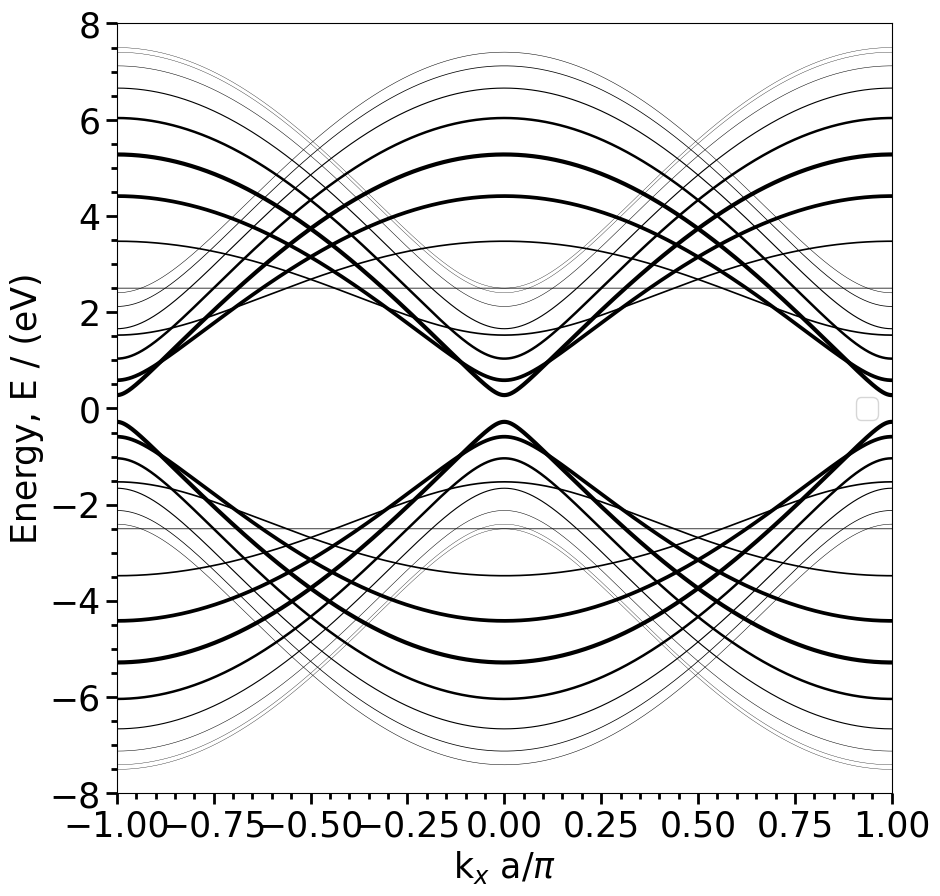

In [9]:
def get_dispersion(m,gamma,nu,E_nu,kxa_arr):
    kyb=2*np.pi*nu/(2*m)
    for kxa in kxa_arr:
        E_nu.append(gamma*np.sqrt(1+(4*np.cos(kyb)*np.cos(kxa))+(4*np.cos(kyb)**2)))

k_pi=np.linspace(-np.pi,np.pi,2401) # range*pi    
k = k_pi/np.pi

nu_label=str(sorted_M_arr)
#print(nu_label)
E_k=[]
linewidth=[]
counter=0
lw=3


for p in sorted_M_arr:
    E_nu=[]
    get_dispersion(m,gamma,p,E_nu,k_pi)
    E_k.append(E_nu)
    E_nu_inv = []
    for i in range(0,len(k)):
        E_nu_inv.append(-1*E_nu[i])
    E_k.append(E_nu_inv)
    linewidth.append(lw)
    linewidth.append(lw)
    counter += 1
    if (counter%2 == 0):
        lw=4*np.exp(-0.2*counter)

print('size of E_k',np.shape(E_k))

custom_plot_single(2*M*[k], 
                   E_k,
                   2*M*[None],
                   [-1,1],[-8,8],[r'k$_x$ a/$\pi$',r'Energy, E / (eV)'],'Dispersion_all.png',
                   2*M*['k'],
                   2*M*['solid'],
                   2*M*[None],
                   2*M*['none'],
                   linewidth,2*M*['none'])

gamma 2.5 1.42e-10 6.263096251991558e-10
minimum band gap: (eV) 0.566812301323193


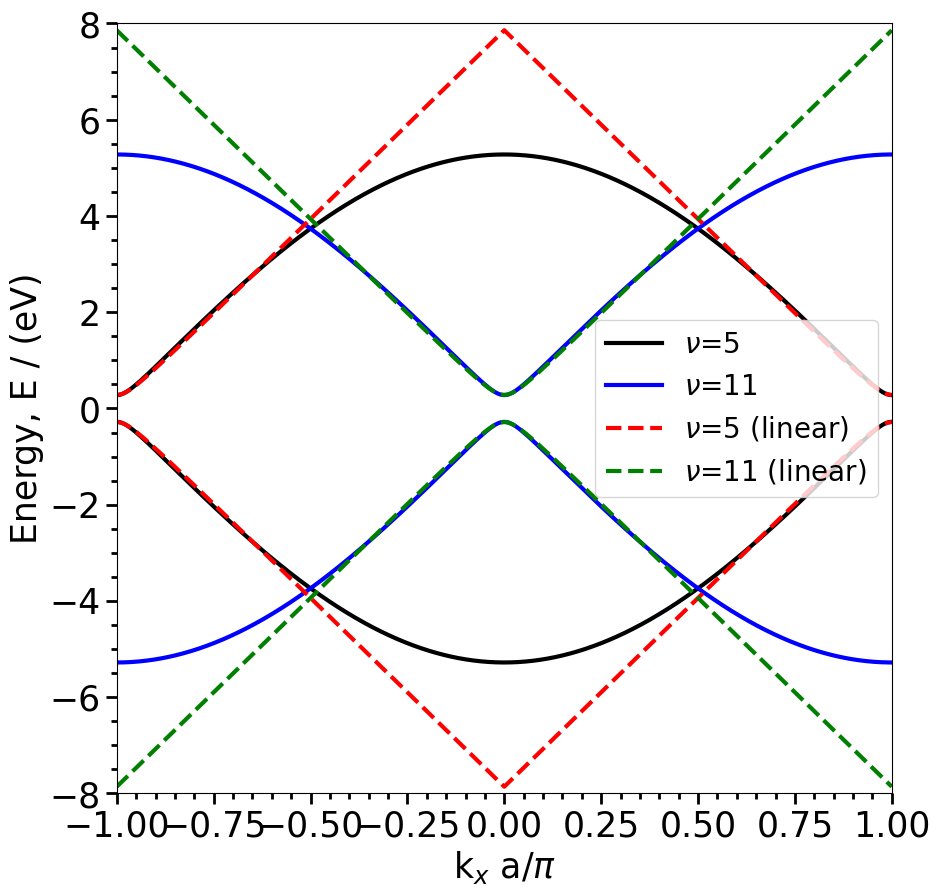

In [10]:
import operator
p1=sorted_M_arr[0]
p2=sorted_M_arr[1]
Eg = gamma*acc/R
print('gamma',gamma,acc,R)
a=3*acc/2 
b=np.sqrt(3)*acc/2

def get_linear_approximate_dispersion(m,gamma,nu,E_nu,kxa_arr,kf):
    kyb=2*np.pi*nu/(2*m)
    factor=-1
    for kxa in kxa_arr:
        if(kxa > 0):
            factor =1
        E_nu.append((3*gamma/2)*np.sqrt((kxa*2/3-factor*kf[0]*acc)**2 + ((kyb*2/np.sqrt(3)-kf[1]*acc))**2))      

kf=[np.pi/a, np.pi/(3*b)]
E_lin_1 = []
get_linear_approximate_dispersion(m,gamma,p1,E_lin_1,k*np.pi,kf)
E_lin_1_minus=list(map(operator.mul, E_lin_1, [-1]*len(E_lin_1))) #multiply all elements in list by -1

kf=[0, 2*np.pi/(3*b)]
E_lin_2 = []
get_linear_approximate_dispersion(m,gamma,p2,E_lin_2,k*np.pi,kf)
E_lin_2_minus=list(map(operator.mul, E_lin_2, [-1]*len(E_lin_2))) #multiply all elements in list by -1


custom_plot_single([k,k,k,k,k,k,k,k], 
                   [E_k[2*1-2],E_k[2*1-1],E_k[2*2-2],E_k[2*2-1],
                    E_lin_1,E_lin_1_minus,E_lin_2, E_lin_2_minus],
                   [r'$\nu$='+str(int(p1)),None, r'$\nu$='+str(int(p2)), None, r'$\nu$='+str(int(p1))+' (linear)',None, r'$\nu$='+str(int(p2))+' (linear)',None],
                   [-1,1],[-8,8],[r'k$_x$ a/$\pi$',r'Energy, E / (eV)'],'Dispersion.png',
                   ['k','k','b','b','r','r','g','g'],
                   ['solid','solid','solid','solid','dashed','dashed','dashed','dashed'],
                   8*[None],
                   8*['none'])
print('minimum band gap: (eV)', Eg)

### Construct hamiltonian H

In [11]:
#The following 2 functions are to create off-diagonal elements of a hamiltonian
def get_zeros_and_ones(L,lst):
    for i in range(0,L):
        if(i%2==0):
            lst.append(0)
        else:
            lst.append(1)
            
def get_ones_and_zeros(L, lst): 
    for i in range(0,L):
        if(i%2==0):
            lst.append(1)
        else:
            lst.append(0)

lst_01 = [] 
lst_10 = [] 

get_zeros_and_ones(N-1, lst_01)
get_ones_and_zeros(N-1, lst_10)

def get_beta(gamma, M, J): #overlap coefficient in mode-space approximation
    return 2*gamma*np.cos(np.pi*J/M) #*np.exp(-1j*np.pi*J/M)

(16, 4, 4)
(64, 64)


<AxesSubplot: >

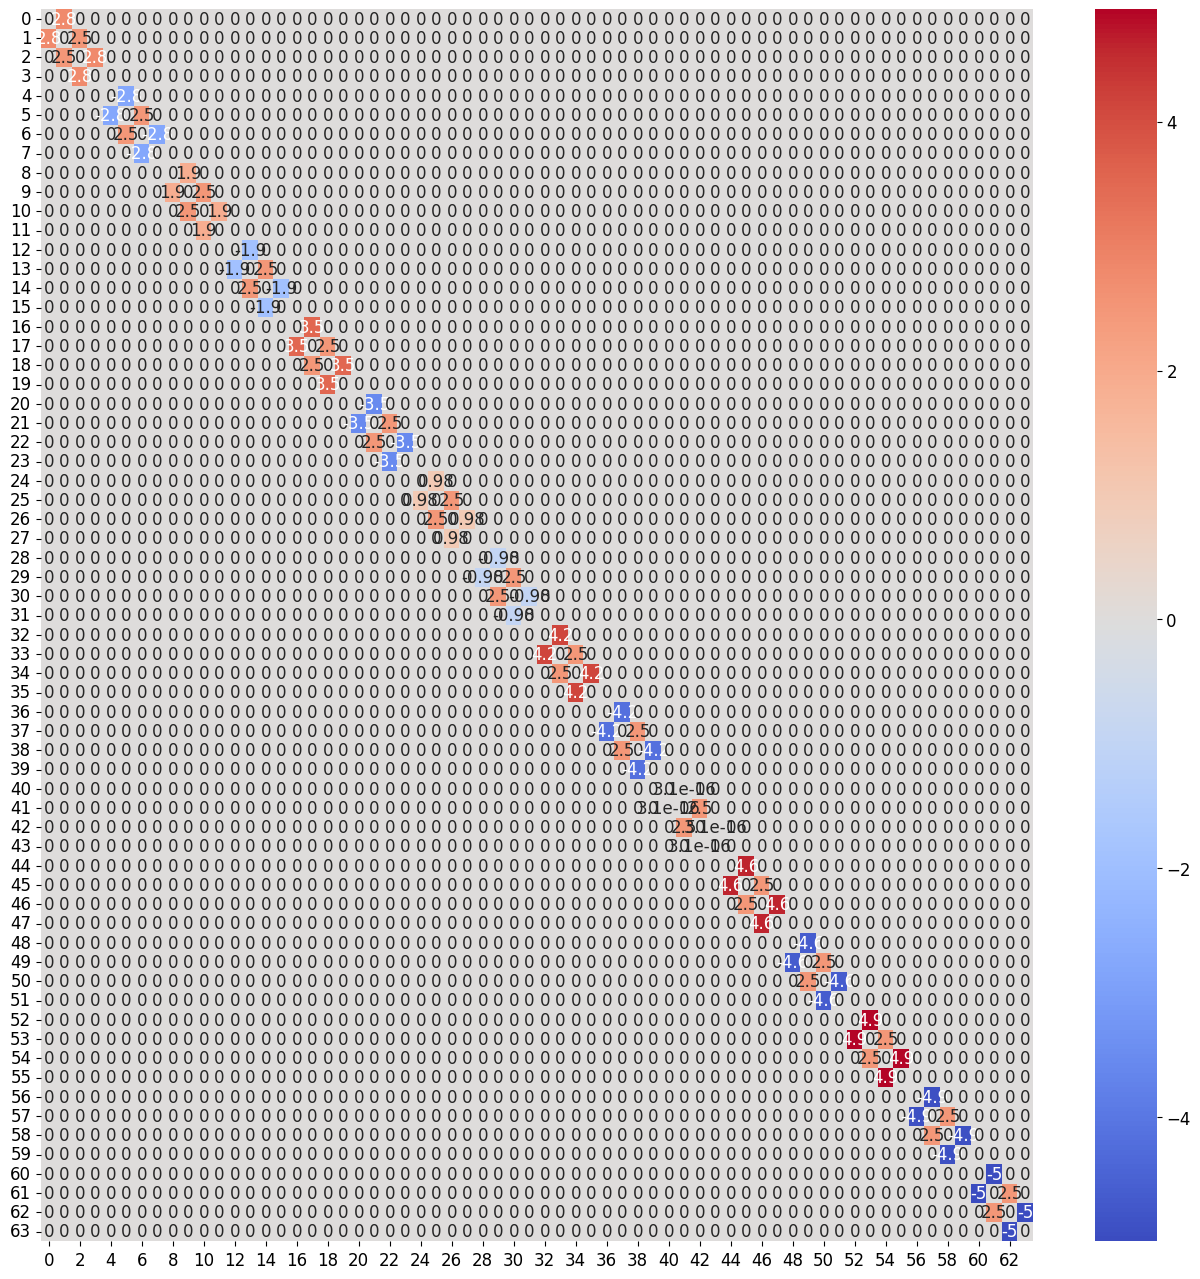

In [12]:
H_mode=np.zeros((M_red,N,N),dtype=float)
print(np.shape(H_mode))
zero_mat=np.zeros((N,N),dtype=float)
#print(np.shape(zero_mat))
H=np.zeros((M_red*N,M_red*N),dtype=float)
print(np.shape(H))
beta = np.zeros(M_red,dtype=float)

for i in range(0,M_red):
    p=M_red_arr[i]
    beta[i] = get_beta(gamma,M,p)
    H_mode[i] =U*np.diag(np.ones(N)) + gamma*np.diag(lst_01,-1)  + beta[i]*np.diag(lst_10,-1) \
    + gamma*np.diag(lst_01,1) + beta[i]*np.diag(lst_10,1) 

H_lst=[]
for i in range (0, M_red):
    submat = []
    for j in range(0, M_red):
        if j==i:
            submat.append(H_mode[i])
        else:
            submat.append(zero_mat)          
    H_lst.append(submat)
H=np.block(H_lst)

plt.figure(figsize = (16,16))
sns.heatmap(H,cmap='coolwarm',annot=True)

### define E-space


In [13]:
Emin=-8.001 #eV
Emax=8.001 #eV
Epts=20000

E=np.linspace(Emin,Emax,Epts,dtype=float)
#print('E',E)

#Define fermi energies and potential due to bias
Ef=0
kb=8.617333262e-5 #eV/K
T=100 #K
mu1=Ef + Us
mu2=Ef - Ud
f1=1./(1.+np.exp(E-mu1)/(kb*T))
f2=1./(1.+np.exp(E-mu2)/(kb*T))

### compute self-energy


In [14]:
def get_analytical_retarted_surface_GF(E, Us,gamma,beta_j,Print):
    EmUs = E-Us
    Factor=EmUs**2 + gamma**2 - beta_j**2
    Sqrt=cmath.sqrt(Factor**2 - 4 * EmUs**2 * gamma**2)
    Denom = 2 * gamma**2 * EmUs

    Numer1= (Factor + Sqrt)
    Numer2= (Factor - Sqrt)
  
    if(Print and Denom  == 0.):
        print('E,Us,gamma,beta_j',E,Us,gamma,beta_j)
        print('*',4 * EmUs**2 * gamma**2/Factor**2)
        print('Sqrt',Sqrt)
        print('Denom',Denom)
        print('Numer1',Numer1)
        print('Numer2',Numer2)
        print(np.imag(Numer1),np.imag(Numer2))

    zplus=1j*1e-5 #small imaginary number

    val1 = Numer1/Denom - zplus
    val2 = Numer2/Denom - zplus
    
    val = 0. + 1j*0.
    if(np.imag(val1) < 0.):
        val = val1 
    elif (np.imag(val2) < 0.):
        val = val2 
    
#     if(np.abs(np.imag(val)) < 1e-2):
#         val = -zplus
    return val

In [15]:
gR_surf_s1 = np.zeros((M_red,Epts),dtype=complex)
gR_surf_d1 = np.zeros((M_red,Epts),dtype=complex)
Ud=0
print('Us,Ud',Us,Ud)

for j in range(0,M_red):
    Print=False
    for e in range(0,Epts):
        if(j==M_red-1):
            Print=False
        gR_surf_s1[j][e] = get_analytical_retarted_surface_GF(E[e],Us,gamma,beta[j],Print)
        gR_surf_d1[j][e] = get_analytical_retarted_surface_GF(E[e],Ud,gamma,beta[j],Print)


Us,Ud 0.0 0


minimum band gap/2 : (eV) 0.2834061506615965


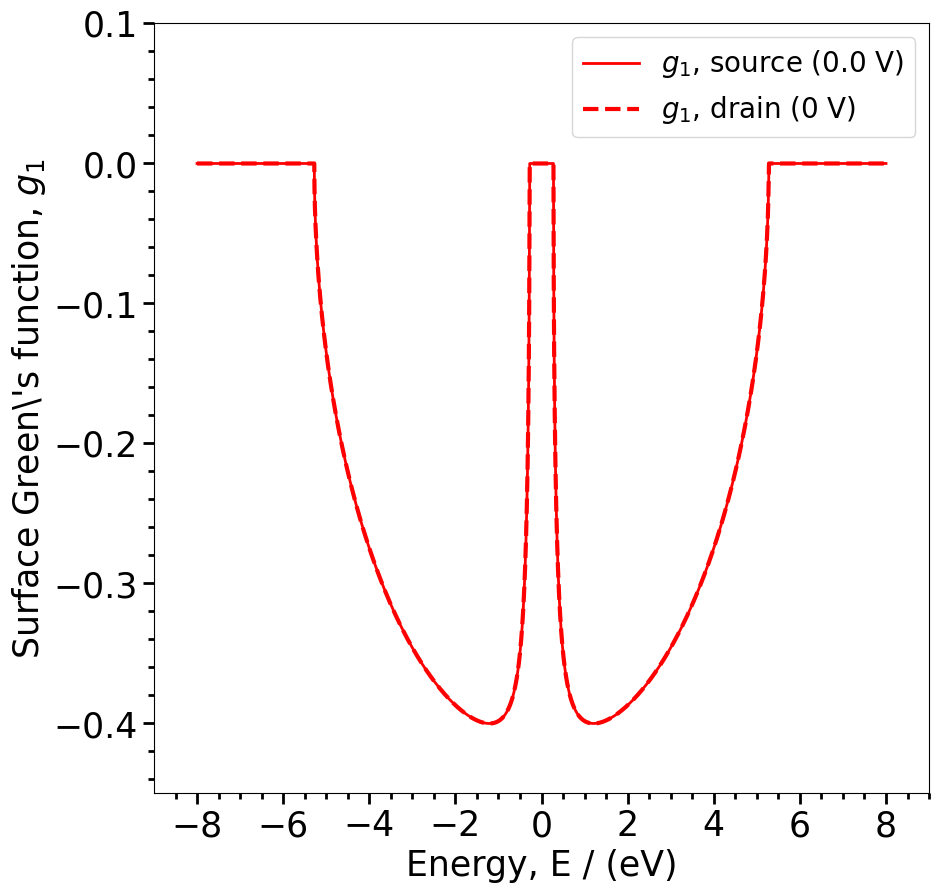

In [16]:
custom_plot_single([E,E], 
                   [ np.imag(gR_surf_s1[0]),np.imag(gR_surf_d1[0]) ],
                   [r'$g_1$, source ('+str(Us)+' V)',r'$g_1$, drain ('+str(Ud)+' V)'],
                   [-9,9],[-0.45,0.1],[r'Energy, E / (eV)',r'Surface Green\'s function, $g_1$'],'g1.png',
                   ['r','r','b','b'],
                   ['solid','dashed','solid','dashed'],
                   4*[None],#['o','^','o','^'],
                   4*['none'],
                   [2,3,2,3])
print('minimum band gap/2 : (eV)', Eg/2)


### compute Self-energy and Level-broadning

In [17]:
Sigma_s_comp = np.zeros((M_red,Epts),dtype=complex)
Sigma_d_comp = np.zeros((M_red,Epts),dtype=complex)
Gamma_s_comp = np.zeros((M_red,Epts),dtype=complex)
Gamma_d_comp = np.zeros((M_red,Epts),dtype=complex)

for j in range(0,M_red):
    Sigma_s_comp[j] = gamma**2 * gR_surf_s1[j]
    Sigma_d_comp[j] = gamma**2 * gR_surf_d1[j]
        
    Gamma_s_comp[j] = 1j*(Sigma_s_comp[j] - np.conjugate(Sigma_s_comp[j]))
    Gamma_d_comp[j] = 1j*(Sigma_d_comp[j] - np.conjugate(Sigma_d_comp[j]))

minimum band gap/2 : (eV) 0.2834061506615965


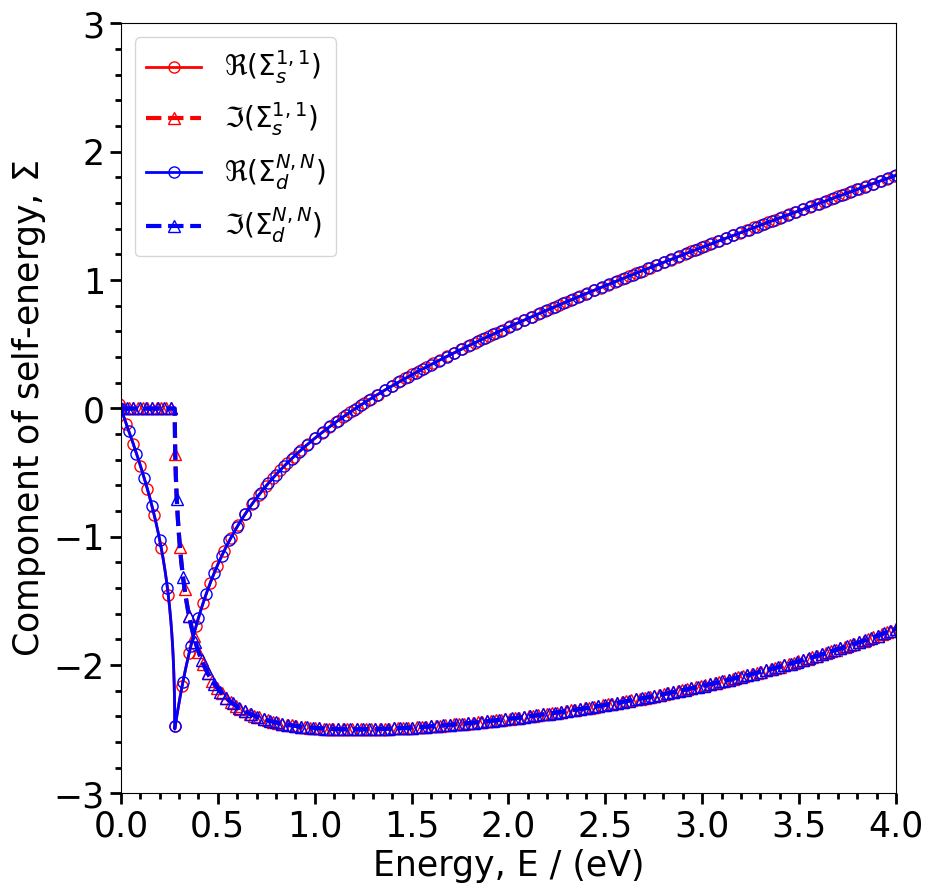

In [18]:
custom_plot_single([E,E,E,E], 
                   [ np.real(Sigma_s_comp[0]), np.imag(Sigma_s_comp[0]), np.real(Sigma_d_comp[0]), np.imag(Sigma_d_comp[0])],
                   [r'$\Re(\Sigma_s^{1,1})$',r'$\Im(\Sigma_s^{1,1})$',r'$\Re(\Sigma_d^{N,N})$',r'$\Im(\Sigma_d^{N,N})$'],
                   [0,4],[-3,3],[r'Energy, E / (eV)',r'Component of self-energy, $\Sigma$'],'Sigma.png',
                   ['r','r','b','b'],
                   ['solid','dashed','solid','dashed'],
                   ['o','^','o','^'],
                   4*['none'],
                   [2,3,2,3])
print('minimum band gap/2 : (eV)', Eg/2)


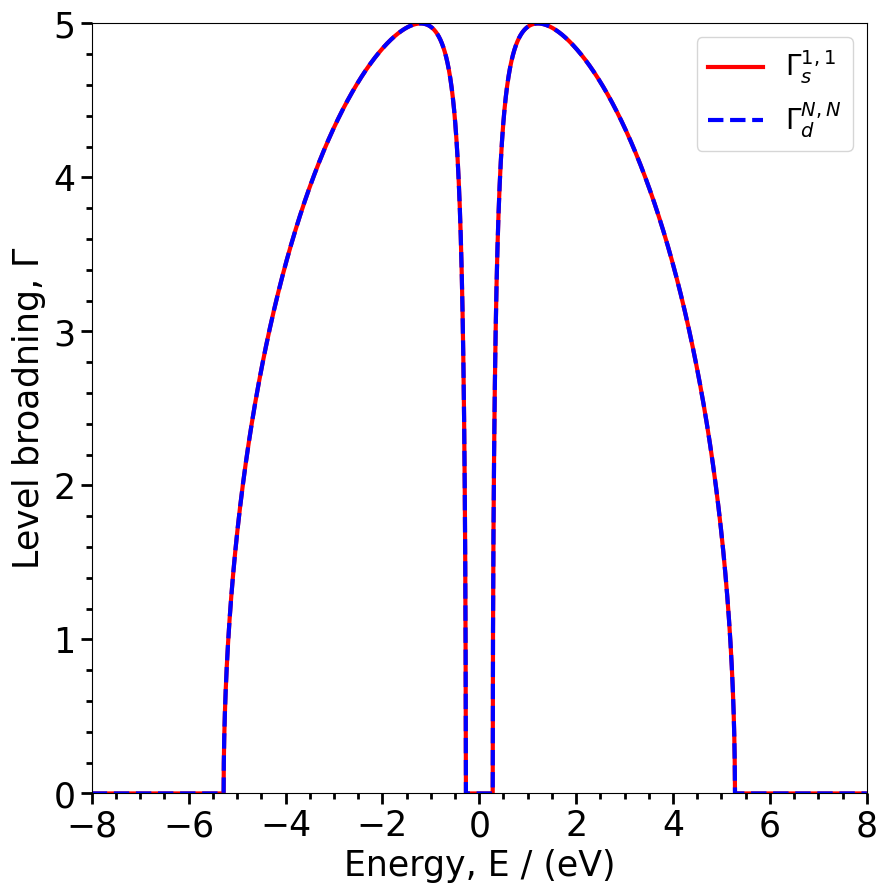

In [19]:
custom_plot_single([E,E], 
                   [ np.real(Gamma_s_comp[0]), np.real(Gamma_d_comp[0])],
                   [r'$\Gamma_s^{1,1}$',r'$\Gamma_d^{N,N}$'],
                   [-8,8],[0,5],[r'Energy, E / (eV)',r'Level broadning, $\Gamma$'],'Gamma.png',
                   ['r','b'],
                   ['solid','dashed'],
                   2*[None],
                   2*['none'],
                   [3,3])

In [20]:
from numpy.linalg import inv
zplus=1j*1e-12 #small imaginary number

T=np.zeros(Epts,dtype=float)
D=np.zeros(Epts,dtype=float)

I=0. #Current

In [21]:
for e in range(0,Epts):
    Sigma_s=np.zeros((M_red*N,M_red*N),dtype=complex)
    Sigma_d=np.zeros((M_red*N,M_red*N),dtype=complex)
    Gamma_s=np.zeros((M_red*N,M_red*N),dtype=complex)
    Gamma_d=np.zeros((M_red*N,M_red*N),dtype=complex)
    for j in range(0,M_red):
        Sigma_s[j*N][j*N] = Sigma_s_comp[j][e]
        Sigma_d[(j+1)*N-1][(j+1)*N-1] = Sigma_d_comp[j][e]
        Gamma_s[j*N][j*N] = Gamma_s_comp[j][e]
        Gamma_d[(j+1)*N-1][(j+1)*N-1] = Gamma_d_comp[j][e]
#         print('\Sigma_s',Sigma_s[j*N][j*N], Sigma_s_comp[j][e])
#         print('\Sigma_d',Sigma_d[(j+1)*N-1][(j+1)*N-1], Sigma_d_comp[j][e])
#         print('\Gamma_s',Gamma_s[j*N][j*N], Gamma_s_comp[j][e])
#         print('\Gamma_d',Gamma_d[(j+1)*N-1][(j+1)*N-1], Gamma_d_comp[j][e])  

    #or do the following (OK because Sigma matrix is diagonal)
    #Gamma_s = 1j*(Sigma_s - Sigma_s.conj().T) 
    #Gamma_d = 1j*(Sigma_d - Sigma_d.conj().T) 
    #sns.heatmap(np.real(Sigma_d+Sigma_s),cmap='coolwarm',annot=True)
    
    G_R=inv(((E[e]+zplus)*np.eye(M_red*N))- H - Sigma_s - Sigma_d)
    G_A = G_R.conj().T
    T[e]=np.real(np.trace(Gamma_s@G_R@Gamma_d@G_A))
    D[e]=np.real(np.trace(1j*(G_R - G_A)/(2*np.pi)))

#    I=I+(dE*IE*T[e]*(f1[k]-f2[k])) 

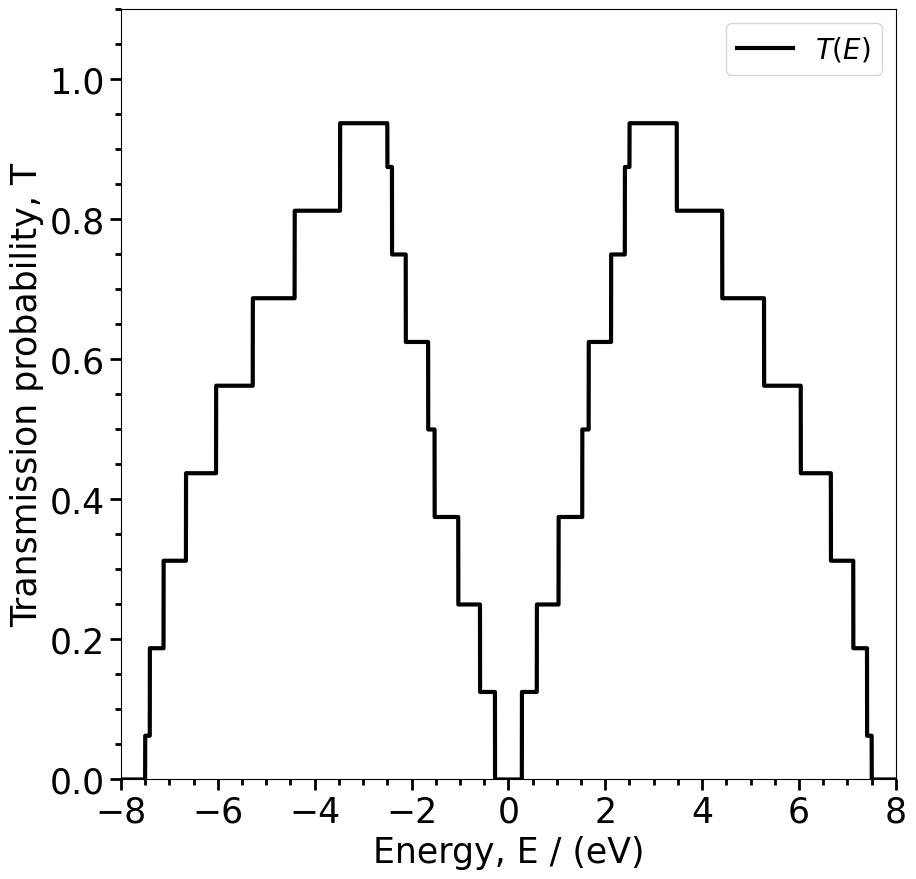

In [22]:
custom_plot_single([E], 
                   [T/M_red],
                   [r'$T(E)$'],
                   [-8,8],[0,1.1],[r'Energy, E / (eV)',r'Transmission probability, T'],'Transmission_Prob_%d_%d.png'%(m,n),
                   ['k'],
                   ['solid'],
                   1*[None],
                   1*['none'],
                   [3])


In [23]:
print(D)

[10185.96936119 10185.96933833 10185.96931547 ... 10185.96931547
 10185.96933833 10185.96936119]


# Comparison with Mintmire & White (Theory and First principles)

In [24]:
nu0=np.round(2*m/3)
print(nu0+M)
#Mode_arr_Mintmire=np.linspace(-M,M,2*M+1)
Mode_arr_Mintmire=np.linspace(-M,M,2*M+1)

#Mode_arr_datta=np.linspace(nu0-M,nu0+M,2*M+1)
print('Mode_arr_Mintmire',Mode_arr_Mintmire)
#print('Mode_arr_datta',Mode_arr_datta)

Lambda_Mintmire = 2*R/acc
print('Lambda_Mintmire',Lambda_Mintmire)

print('sorted_M_arr',sorted_M_arr)

27.0
Mode_arr_Mintmire [-16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  13.  14.  15.  16.]
Lambda_Mintmire 8.821262326748673
sorted_M_arr [5, 11, 6, 10, 4, 12, 7, 9, 3, 13, 8, 2, 14, 1, 15, 16]


In [25]:
##Francois' book
D_th_lin = np.zeros(Epts, dtype=float)

for e in range(0,Epts):
    const = acc*np.sqrt(3)/(np.pi**2*R*gamma)
    Sum=0.
    for nu in Mode_arr_Mintmire:
        eps_m = np.abs(3*nu-m+n)*acc*gamma/(2*R) 
        if(np.abs(E[e]) > np.abs(eps_m)):
            Sum += np.abs(E[e])/cmath.sqrt(E[e]**2 - eps_m**2)
        elif(np.abs(E[e]) < np.abs(eps_m)):
            Sum +=0
    D_th_lin[e] = const*np.real(Sum)#*num_atoms

dE_dk = np.zeros((M,np.size(k)),dtype=float)
for p in range(1,M+1):
    dE_dk[p-1] = np.gradient(E_k[p*2-2])
    
# D_th = np.zeros(Epts, dtype=float)   
# for e in range(0,Epts):
#     print('e',e)
#     const = acc**2*np.sqrt(3)/(np.pi**2*R)
#     Sum=0.+1j*0.
#     for p in range(1,M+1):
#         #print(p)
#         k_sum=0.
#         for kx in range(0,np.size(k)):
#             convergence=np.abs((np.abs(E[e])-np.abs(E_k[p*2-2][kx]))/E[e])
#             if(convergence < 1e-3): 
#                 k_sum += 1./(np.abs(dE_dk[p-1][kx]))
#                 if(np.abs(dE_dk[p-1][kx])==0):
#                     print('mode, convergence, E, E(k)', sorted_M_arr[p-1], convergence, E[e],E_k[p*2-2][kx])
#             else:
#                 k_sum=0.
#         Sum += k_sum*(k[1]-k[0])
#     D_th[e] = const*np.real(Sum)


###Supriyo Datta's
#
# D_th_datta = np.zeros(Epts, dtype=float)

# for e in range(0,Epts):
#     a=3*acc/2.
#     L=1*(3/4)*acc/17
#     const = (2*L/(np.pi*a*gamma))
#     Sum=0.
#     for nu in Mode_arr_datta:
#         Ek = (gamma*2*np.pi/np.sqrt(3))*(3*nu/(2*m)-1)+1j*1e-12
#         Sum += E[e]/cmath.sqrt(E[e]**2 - Ek**2)
        
#     D_th_datta[e] = const*Sum

In [26]:
import pandas as pd
Mintmire_path = 'Mintmire_Fid3_dotted_16-0.csv'
Mintmire_data = pd.read_csv(Mintmire_path, sep=", ", skiprows=1, usecols=[0,1], names=["E", "D"])
#print(Mintmire_data)

/tmp/ipykernel_11541/848006301.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Mintmire_data = pd.read_csv(Mintmire_path, sep=", ", skiprows=1, usecols=[0,1], names=["E", "D"])


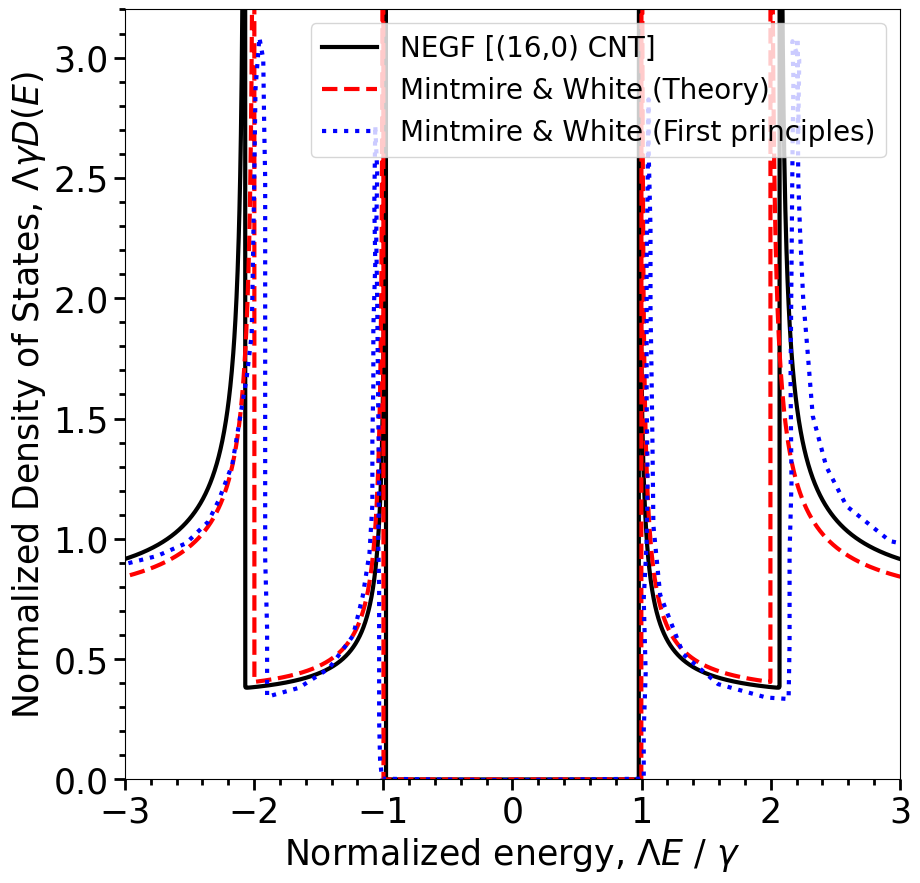

In [27]:
custom_plot_single([Lambda_Mintmire*E/gamma,Lambda_Mintmire*E/gamma,Mintmire_data.E], 
                   [Lambda_Mintmire*gamma*D*2/M/N,Lambda_Mintmire*gamma*D_th_lin,Mintmire_data.D],
                   [r'NEGF [(%d,%d) CNT]'%(m,n), r'Mintmire & White (Theory)', r'Mintmire & White (First principles)'],
                   [-3,3],[0,3.2],[r'Normalized energy, $\Lambda E$ / $\gamma$',r'Normalized Density of States, $\Lambda \gamma D(E)$'],'DOS_MintmireCompare_%d_%d.png'%(m,n),
                   ['k','r','b'],
                   ['solid','dashed','dotted'],
                   3*[None],
                   3*['none'],
                   3*[3])

# Bandgap vs m

In [28]:
def get_bandgap_from_DOS(E, Dnorm):
    Epts = np.size(E)
    e_plus_traverse = True
    e_minus_traverse = True
    e_plus = 0.
    e_minus = 0.
    bandgap = 0.
    if(Dnorm[int(Epts/2.)] > 1e-3):
        bandgap = 0. 
    else:
        for e in range(int(Epts/2.), Epts):
            if(e_plus_traverse):
                if(E[e] > 0.):
                    if(Dnorm[e] > 0.1):
                        e_plus = E[e]
                        e_plus_traverse = False
                        break
                
        for e in np.arange(int(Epts/2.), 0,-1):
            if(e_minus_traverse):
                if(E[e] < 0.):
                    if(Dnorm[e] > 0.1):
                        e_minus = E[e]
                        e_minus_traverse = False
                        break
                        print(E[e],D[e])
        bandgap = e_plus - e_minus
    return bandgap

bandgap_negf = get_bandgap_from_DOS(E, Lambda_Mintmire*gamma*D*2/M/N )
print('m, n, bandgap_negf, bandgap_theory: ', m, n, bandgap_negf, Eg_min)


m, n, bandgap_negf, bandgap_theory:  16 0 0.5560973048652436 0.566812301323193


In [29]:
bandgap_vs_m = [(9, 0., 0.),                  #using 10k Epts up to m=40
                (10,0.8786, 0.9069),
                (11, 0.8466, 0.8245),
                (12, 0.    , 0.),
                (13, 0.6834, 0.6976),
                (14, 0.6642, 0.6478),
                (15, 0.    , 0.),
                (16, 0.5585, 0.5668),
                (17, 0.5457, 0.5334),
                (18, 0.    , 0.),
                (19, 0.4721, 0.4773),
                (20, 0.4625, 0.4535),
                (21, 0.    , 0.),
                (22, 0.4081, 0.4122),
                (23, 0.4017, 0.3943),
                (24, 0., 0.),
                (25, 0.3601, 0.3628),
                (26, 0.3537, 0.3488),
                (27, 0., 0.),
                (28, 0.3217, 0.3239),
                (29, 0.3185, 0.3127),
                (30, 0., 0.),
                (31, 0.2897, 0.2926),
                (32, 0.2865, 0.2834),
                (33, 0., 0.),
                (34, 0.2673, 0.2667),
                (35, 0.2641, 0.2591),
                (36, 0., 0.),
                (37, 0.2449, 0.2451),
                (38, 0.2417, 0.2387),
                (39, 0., 0.),
                (40, 0.2256507, 0.2267)]
#                 (41, 0.22565076507650694, 0.2212),#need 20k or more pts beyond this
#                 (42, 0., 0.),
#                 (66, 0.    , 0.),
#                 (67, 0.1360, 0.1354)]

size = int(np.size(bandgap_vs_m)/np.size(bandgap_vs_m[0]))
m_arr = np.zeros(size,dtype=int)
bgap_comp_arr = np.zeros(size,dtype=float)
bgap_theo_arr = np.zeros(size,dtype=float)
#rad_arr = get

counter=0
for tuple_obj in bandgap_vs_m:
    m_arr[counter] = tuple_obj[0]
    bgap_comp_arr[counter] = tuple_obj[1]
    bgap_theo_arr[counter] = tuple_obj[2]
    counter +=1

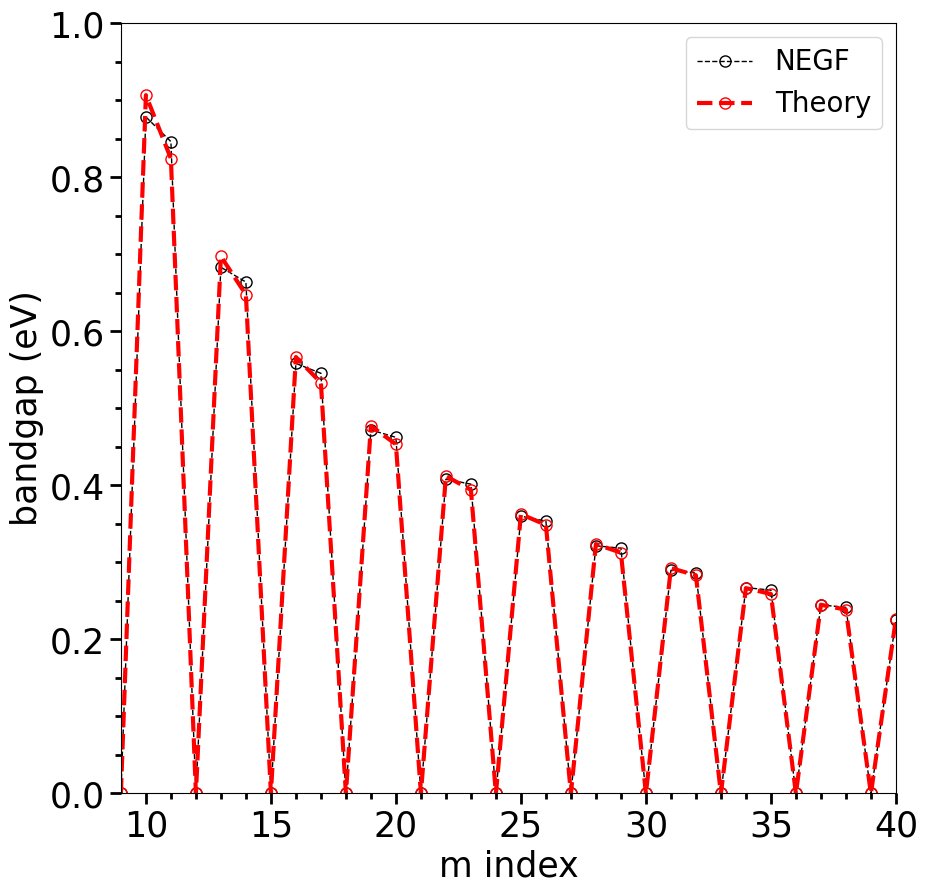

In [30]:
custom_plot_single([m_arr,m_arr], 
                   [bgap_comp_arr,bgap_theo_arr],
                   [r'NEGF', r'Theory'],
                   [m_arr[0],m_arr[-1]],[0,1],[r'm index',r'bandgap (eV)'],'bandgap_vs_m.png',
                   ['k','r','b'],
                   ['dashed','dashed','dotted'],
                   ['o','o'],
                   3*['none'],
                   [1,3], markevery=[1,1,1])